In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("Bank Churn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [5]:
df.loc[((df['Geography']=='fra') | (df['Geography']=='france')),'Geography'] = 'France'
df.loc[((df['Geography']=='ger') | (df['Geography']=='germany') | (df['Geography']=='gernamy') | (df['Geography']=='GERMANY')),'Geography']='Germany'
df.loc[((df['Geography']=='espanio') | (df['Geography']=='spain')),'Geography'] = 'Spain'

In [6]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.select_dtypes(include=object).columns

Index(['Geography', 'Gender'], dtype='object')

/var/folders/0k/fvxrc6xx287214q6n9hdy0500000gn/T/ipykernel_3267/3409400506.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


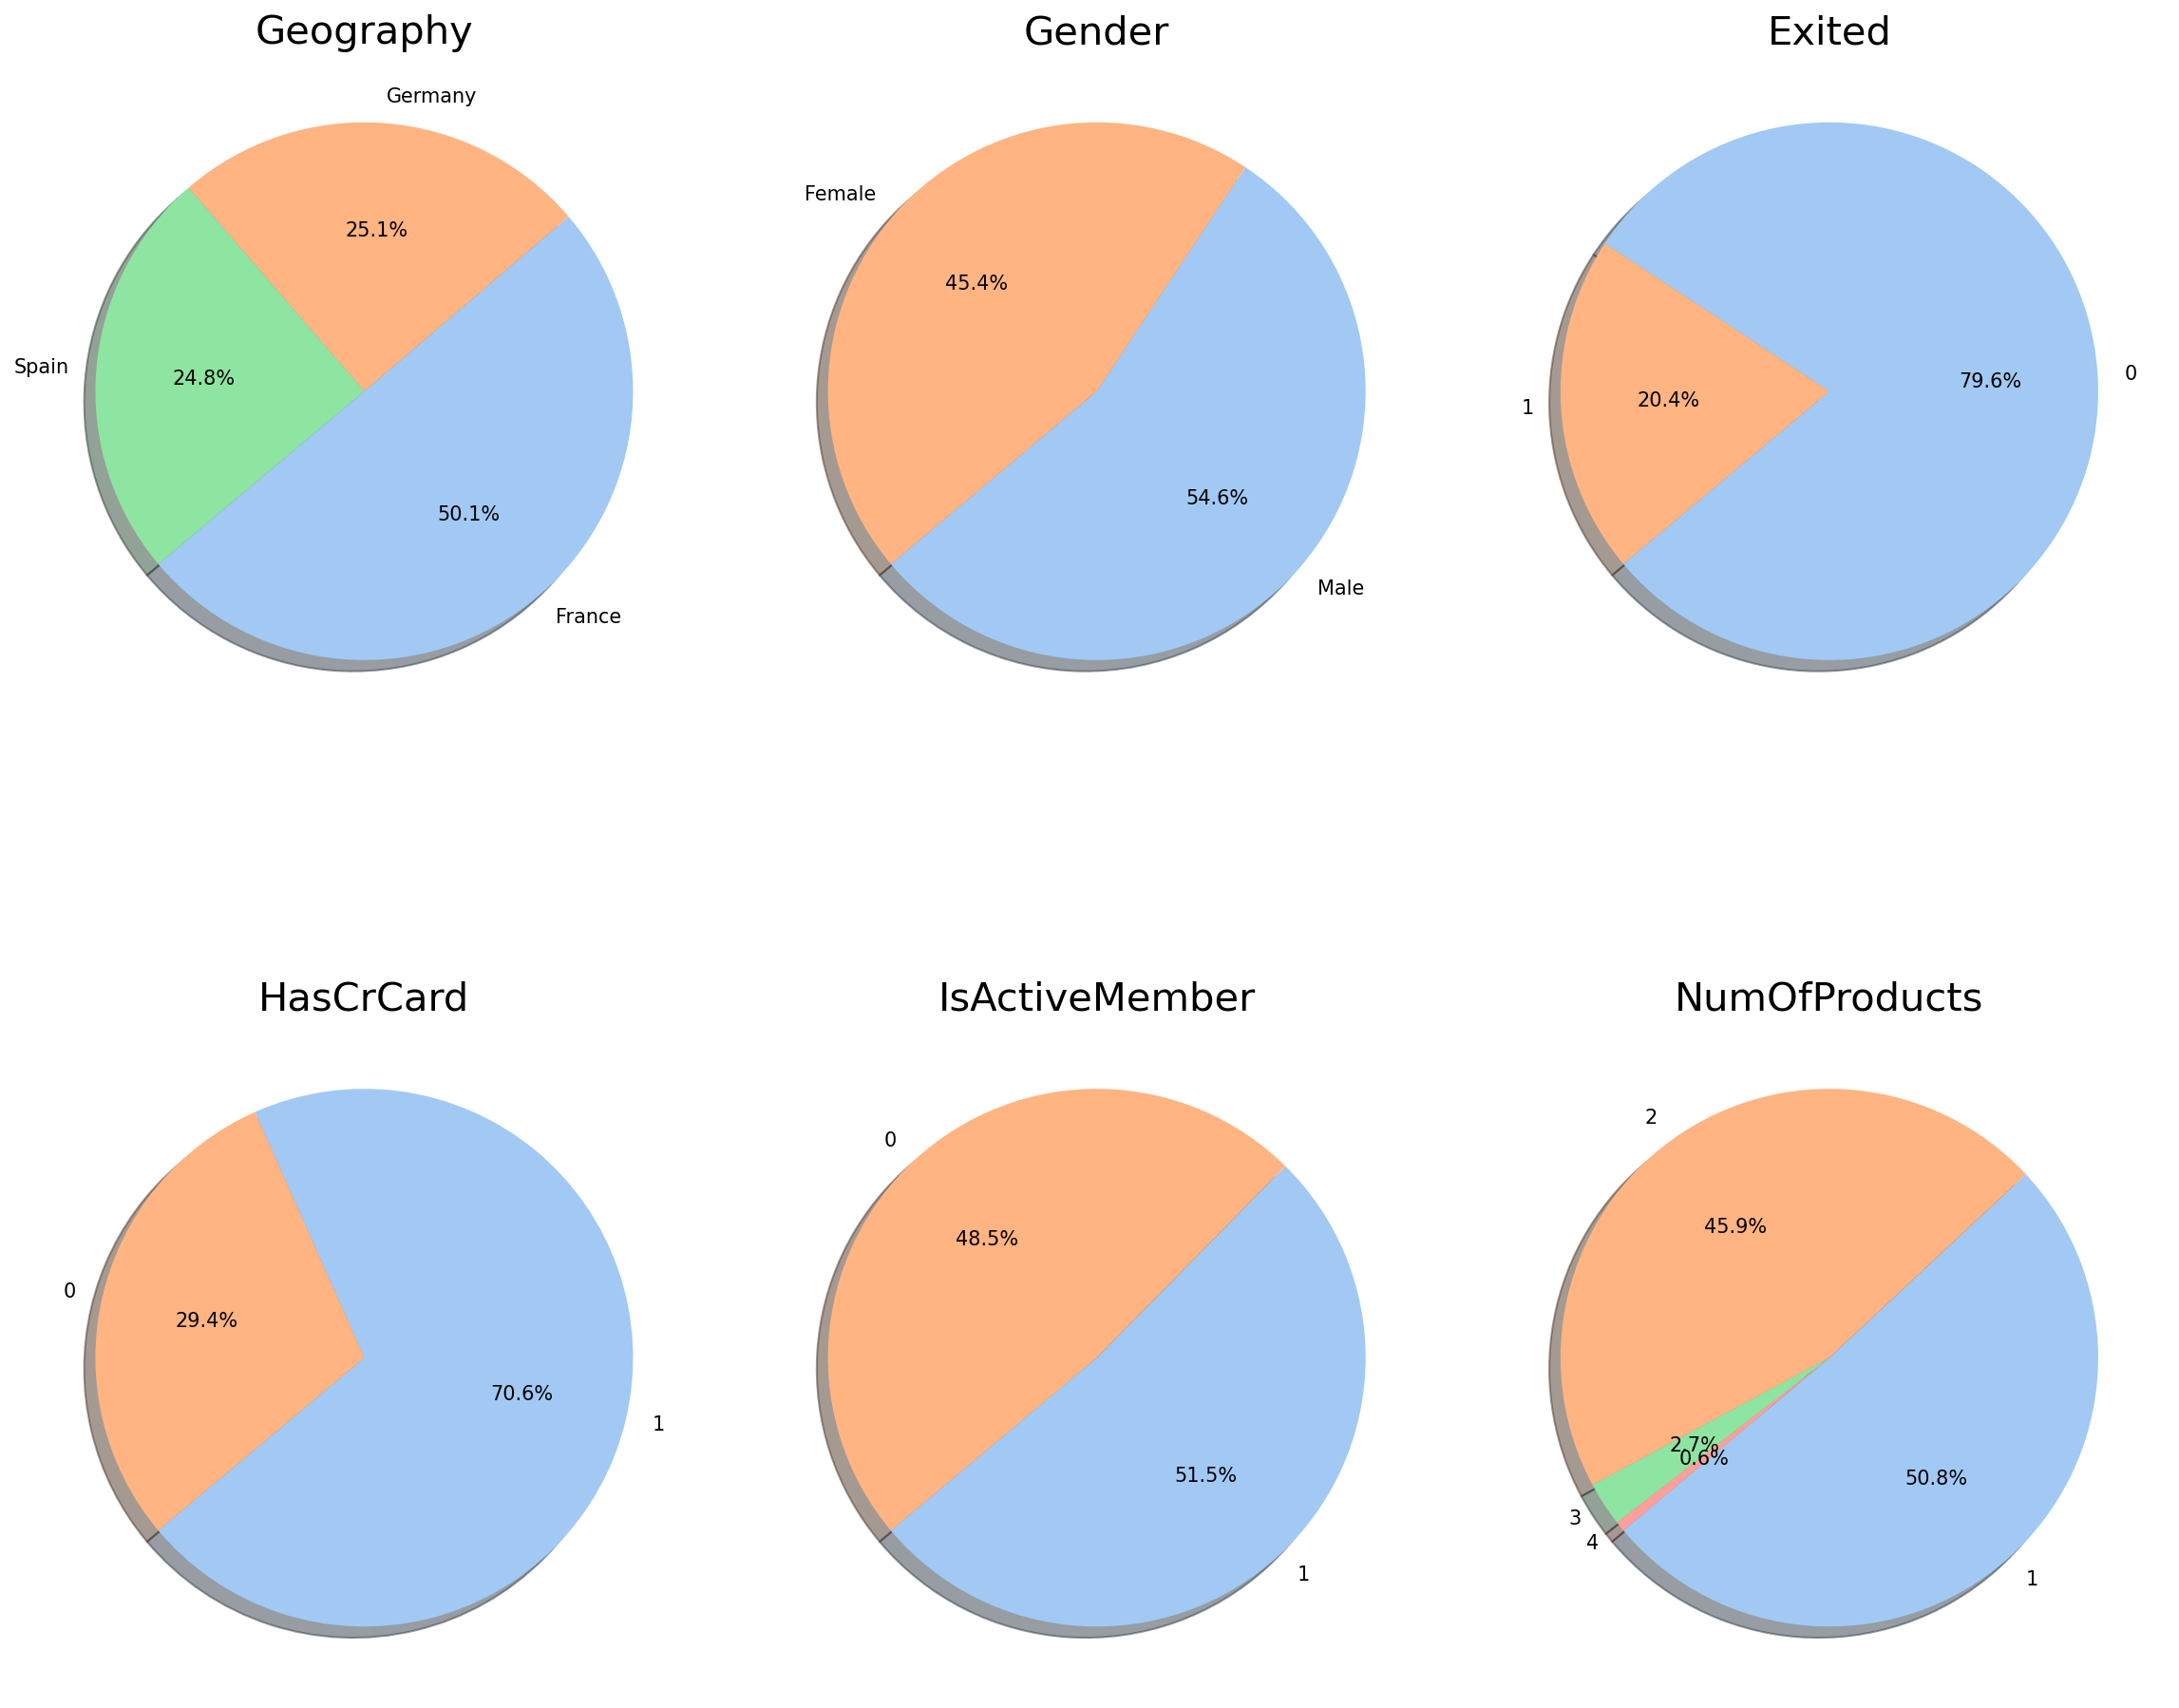

In [9]:
fig , axes = plt.subplots(nrows=2, ncols=3, constrained_layout=True,figsize=(5,1),dpi=150)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)
colors = sns.color_palette('pastel')[0:10]
for ax, column in zip(axes.flatten(),['Geography', 'Gender','Exited','HasCrCard','IsActiveMember','NumOfProducts']): 
    ax.set_title(column,fontsize=20)
    data= df[column].value_counts()
    labels =  data.keys()    #labels = list(data.index)
    #fig.patch.set_facecolor('xkcd:white')
    ax.pie(data,labels =labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=220)
plt.show()

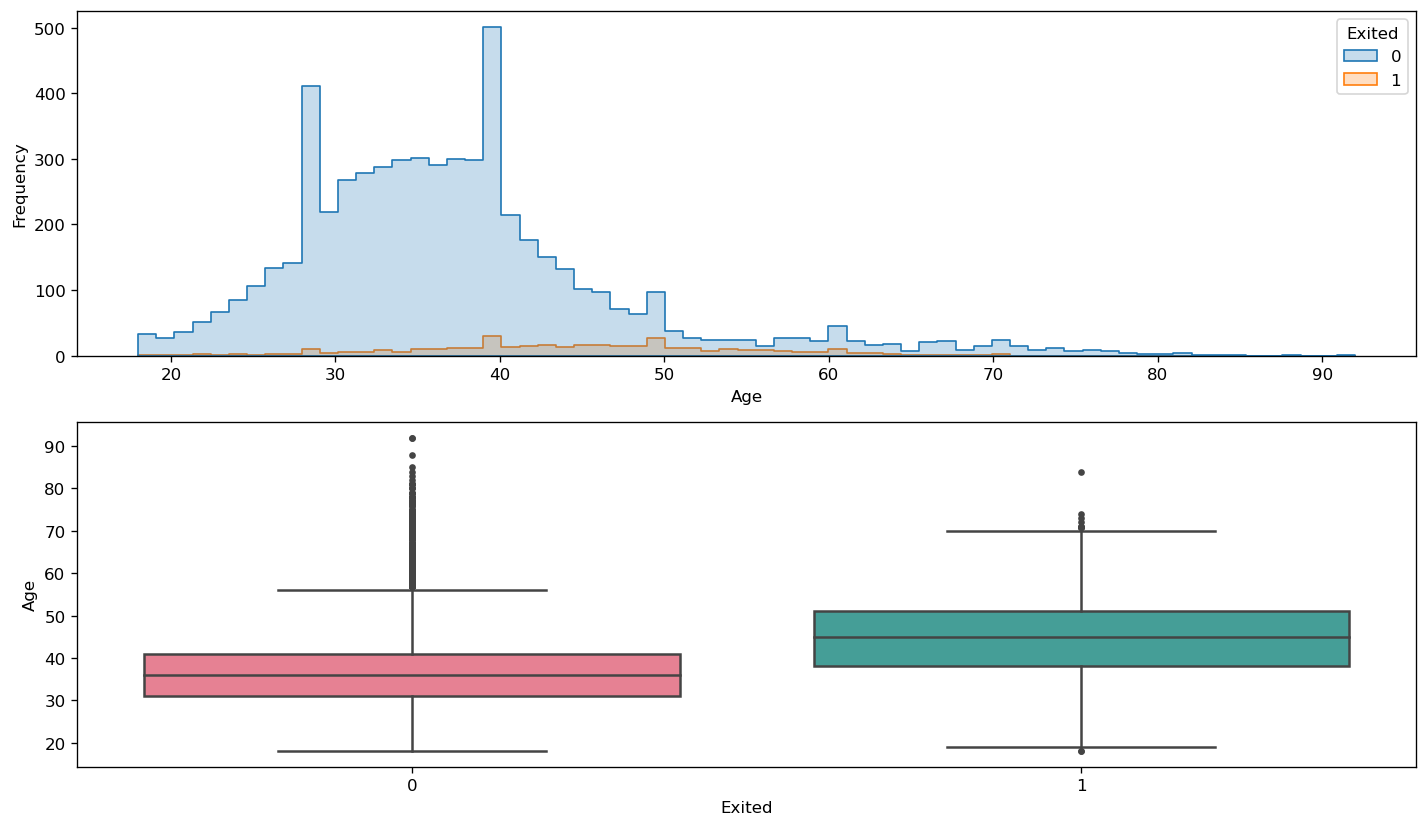

In [10]:
fig, ax = plt.subplots(2,1, figsize= (12, 7),dpi=120)
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
sns.histplot(x=df['Age'],hue =df['Exited'] ,ax=ax[0],log_scale=False, element='step',stat='frequency')
ax[0].tick_params(axis="x", labelrotation=0)
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
flierprops = dict(marker='o', markersize=3)
sns.boxplot(x=df['Exited'], y= df['Age'], palette="husl",ax=ax[1],flierprops=flierprops)
#plt.xlim([0,20000]);
plt.tight_layout()

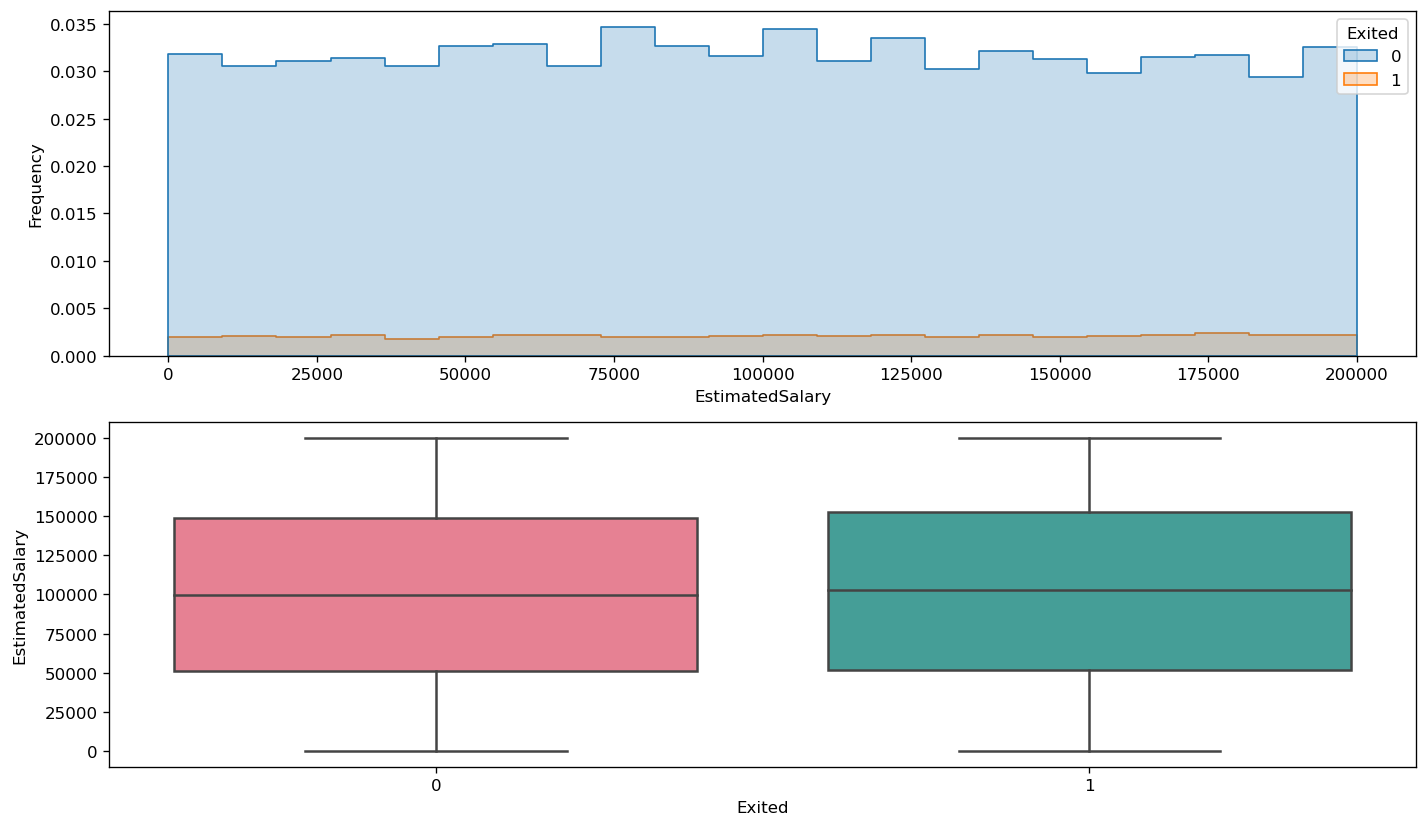

In [11]:
fig, ax = plt.subplots(2,1, figsize= (12, 7),dpi=120)
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
sns.histplot(x=df['EstimatedSalary'],hue =df['Exited'] ,ax=ax[0],log_scale=False, element='step',stat='frequency')
ax[0].tick_params(axis="x", labelrotation=0)
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 40 , ha = "right")
flierprops = dict(marker='o', markersize=3)
sns.boxplot(x=df['Exited'], y= df['EstimatedSalary'], palette="husl",ax=ax[1],flierprops=flierprops)
#plt.xlim([0,20000]);
plt.tight_layout()

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

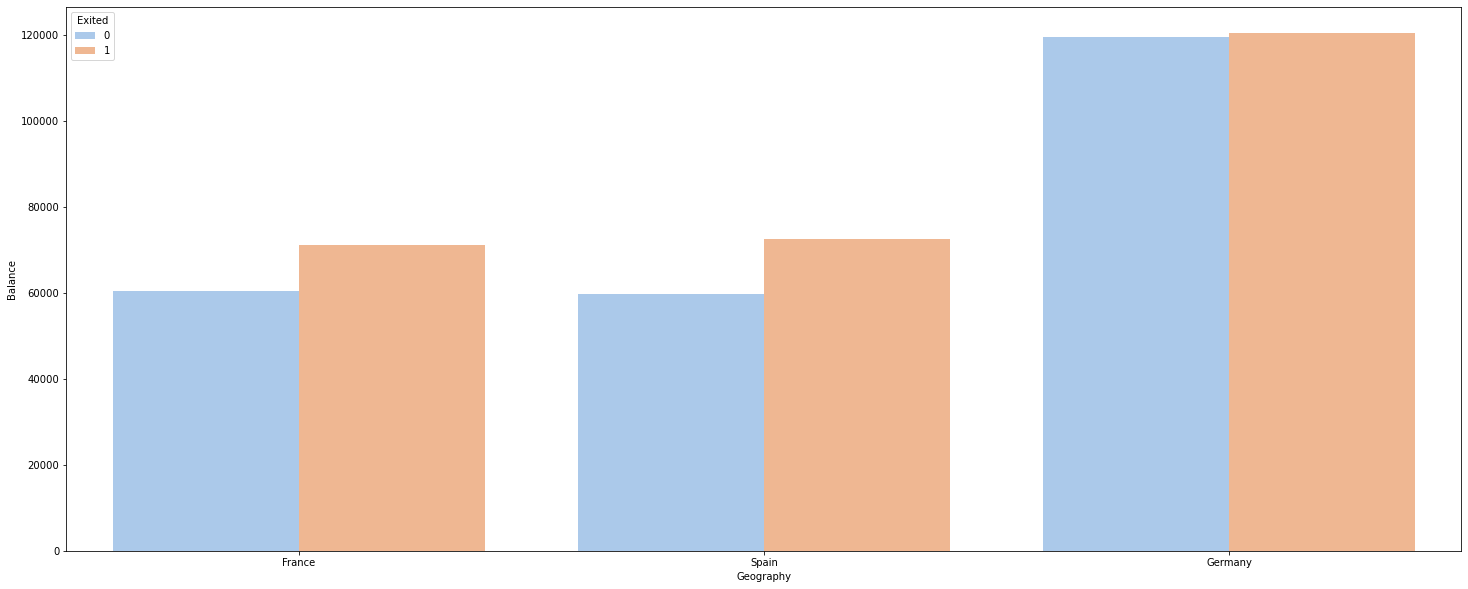

In [12]:
plt.figure(figsize=(25,10))
sns.barplot(data =df, x='Geography',y='Balance',           
            hue ='Exited',palette=colors,ci=0)


<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

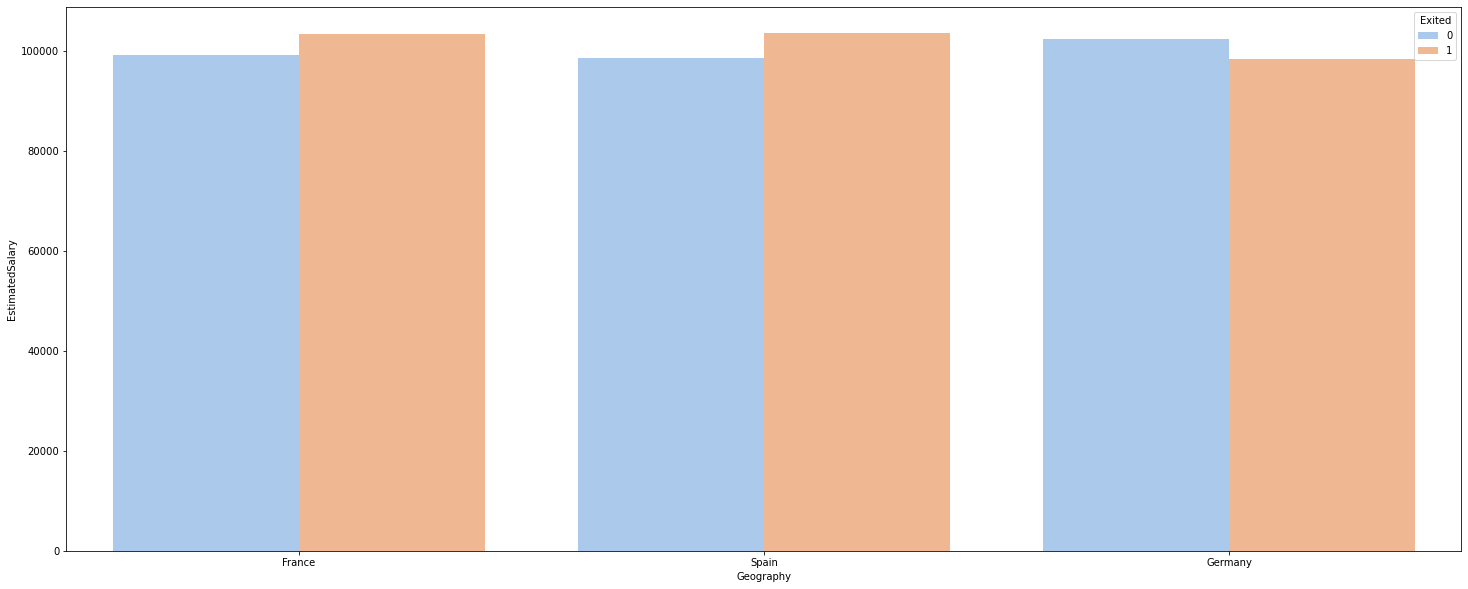

In [13]:
colors = sns.color_palette('pastel')[0:10]
plt.figure(figsize=(25,10))
sns.barplot(data =df, x='Geography',y='EstimatedSalary',           
            hue ='Exited',palette=colors,ci=0)

In [14]:
enc=make_column_transformer((OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['Geography','Gender','Age']),remainder='passthrough')
scale=make_column_transformer((MinMaxScaler(),[]),remainder='passthrough')

In [15]:
pipe_lr=Pipeline([('encode',enc),('scale',scale),('clf',LogisticRegression())])
pipe_gnb=Pipeline([('encode',enc),('scale',scale),('clf',GaussianNB())])
pipe_dt=Pipeline([('encode',enc),('scale',scale),('clf',DecisionTreeClassifier())])
pipe_xgb=Pipeline([('encode',enc),('scale',scale),('clf',XGBClassifier())])
pipe_rf=Pipeline([('encode',enc),('scale',scale),('clf',RandomForestClassifier())])

In [16]:
x=df.drop('Exited',axis=1)
y=df['Exited']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,train_size=.8)

In [17]:
mod=[pipe_lr,pipe_gnb,pipe_dt,pipe_xgb,pipe_rf]
name=['Logistic Regression','GaussianNB','Decision Tree Classifier','XGBClassifier','Random Forest Classifier']
for i,_  in enumerate(mod):
    _.fit(x_train,y_train)
    y_pred=_.predict(x_test)
    print(name[i])
    print(classification_report(y_test,y_pred))



Logistic Regression
              precision    recall  f1-score   support

           0       0.80      0.96      0.88      1595
           1       0.33      0.07      0.11       405

    accuracy                           0.78      2000
   macro avg       0.56      0.52      0.50      2000
weighted avg       0.71      0.78      0.72      2000

GaussianNB
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1595
           1       0.37      0.09      0.14       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.51      2000
weighted avg       0.72      0.79      0.73      2000

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1595
           1       0.50      0.56      0.53       405

    accuracy                           0.80      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg      

### HyperParameter Tuning

In [18]:
pipe=Pipeline([('encode',enc),('scale',scale),('clf',LogisticRegression())])
grid_param=[
        {
            "clf":[GaussianNB()]
        },
        {
            "clf":[DecisionTreeClassifier()],
            "clf__max_features":['sqrt'],
            
        },
        {
            'clf':[XGBClassifier()],
            'clf__learning_rate':[0.01],
            "clf__n_estimators":[1000],
            "clf__max_depth":[10],
            "clf__min_child_weight":[5],
            "clf__scale_pos_weight":[2]
        },
        {
            "clf":[RandomForestClassifier()],
             "clf__max_depth":[4],
             "clf__n_estimators":[20],
            "clf__criterion":["gini"]
        },
        {
            'clf':[LogisticRegression()]
        }
        ]

In [19]:
grid=GridSearchCV(pipe,grid_param,cv=5,verbose=0,n_jobs=-1,error_score='raise')
best_model=grid.fit(x_train,y_train)

In [20]:
print(best_model.best_estimator_)


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Geography', 'Gender',
                                                   'Age'])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmaxscaler',
                                                  MinMaxScaler(), [])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=N...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, lear

In [21]:
final_df=df.copy()

In [22]:
final_df['predicted']=best_model.predict(x)

In [23]:
final_df['probability of Not Exited']=best_model.predict_proba(x)[:,0]
final_df['probability of Exited']=best_model.predict_proba(x)[:,1]


In [24]:
final_df['probability of Not Exited'].mean()

0.7499281167984009

In [25]:
final_df['probability of Exited'].mean()

0.25007128715515137

In [26]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
x=load_iris().data
y=load_iris().target
target_names=load_iris().target_names

In [28]:
pca=PCA(.95)
x_pca=pca.fit_transform(x)

lda=LinearDiscriminantAnalysis()
x_lda=lda.fit_transform(x,y)

In [29]:
x_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

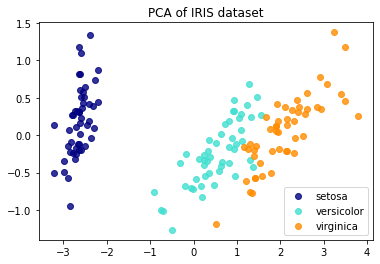

In [30]:
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color=color, alpha=0.8 ,label=target_name)
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("PCA of IRIS dataset")

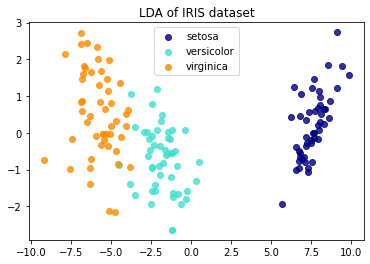

In [31]:
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_lda[y == i, 0], x_lda[y == i, 1], alpha=0.8, color=color, label=target_name)
    plt.legend()
    plt.title("LDA of IRIS dataset")